#Imports

In [ ]:
#time series imports
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

import fbprophet #used for forecasting
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

import math
import random

# visualizations

#!pip install bar_chart_race
import plotly
import plotly.offline as py
#py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as fig_fact
#plotly.tools.set_config_file(world_readable=True, sharing='public')
#import mpl_toolkits.basemap
#from mpl_toolkits.basemap import Basemap
#import folium
#import folium.plugins as plugins

%matplotlib inline

#fitter package for fitting statistical distributions to data
!pip install fitter
import fitter
from fitter import Fitter, get_common_distributions, get_distributions

#usual packages
import warnings
import numpy as np
import pandas as pd
from math import pi
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from IPython.display import HTML,display

warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 47 kB 2.9 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25025 sha256=38cbb5817bf49fcdec0c6fb9b49e0844130a8577b47eecfb96c1819cc46a6998
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=adcd116952ade3c99b2a7892184b5ad29951b2a8abd319aa4fcd0267a2735514
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Loading ground-level ozone concentration data

In [ ]:
URL = 'https://drive.google.com/file/d/126vhrfdz8djGKH_EBnzJNTGESLDxfSY0/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('O3_2000.csv')


URL1 = 'https://drive.google.com/file/d/1KLSjWSGk-xCNQZqywgY9s1Q8SY3j9Niq/view?usp=sharing'
path1 = URL1.split('/')[-2]
fileDownloaded1 = drive.CreateFile({'id': path1})
fileDownloaded1.GetContentFile('O3_2001.csv')

URL2 = 'https://drive.google.com/file/d/14tg0Eef_f7akLaxhPByyWuMuG_SmFV7H/view?usp=sharing'
path2 = URL2.split('/')[-2]
fileDownloaded2 = drive.CreateFile({'id': path2})
fileDownloaded2.GetContentFile('O3_2002.csv')

URL3 = 'https://drive.google.com/file/d/1ssp4YFJZRLcTo7jGTXA3kztJAhA3ESzA/view?usp=sharing'
path3 = URL3.split('/')[-2]
fileDownloaded3 = drive.CreateFile({'id': path3})
fileDownloaded3.GetContentFile('O3_2003.csv')

URL4 = 'https://drive.google.com/file/d/1wdmFkbJyN9wgssS4ykdNUYhm34KbIh4f/view?usp=sharing'
path4 = URL4.split('/')[-2]
fileDownloaded4 = drive.CreateFile({'id': path4})
fileDownloaded4.GetContentFile('O3_2004.csv')

URL5 = 'https://drive.google.com/file/d/1w79nzISaqo_7V6g-oCELW5cjBNQdKw_-/view?usp=sharing'
path5 = URL5.split('/')[-2]
fileDownloaded5 = drive.CreateFile({'id': path5})
fileDownloaded5.GetContentFile('O3_2005.csv')

URL6 = 'https://drive.google.com/file/d/1GqLE9S0LltQPhk3PGC9u3ZKMTGyGMZe3/view?usp=sharing'
path6 = URL6.split('/')[-2]
fileDownloaded6 = drive.CreateFile({'id': path6})
fileDownloaded6.GetContentFile('O3_2006.csv')

URL7 = 'https://drive.google.com/file/d/1K8Vv_xvI9Syv6MbaIwjiz2W57HFu8Kh2/view?usp=sharing'
path7 = URL7.split('/')[-2]
fileDownloaded7 = drive.CreateFile({'id': path7})
fileDownloaded7.GetContentFile('O3_2007.csv')

URL8 = 'https://drive.google.com/file/d/1RL_jmi9W0Pe4B_lGbMTnisOHDWC2qQxk/view?usp=sharing'
path8 = URL8.split('/')[-2]
fileDownloaded8 = drive.CreateFile({'id': path8})
fileDownloaded8.GetContentFile('O3_2008.csv')

URL9 = 'https://drive.google.com/file/d/1WJxDxHjODnfuSdHXmbWrwjmtetIfL6mT/view?usp=sharing'
path9 = URL9.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path9})
fileDownloaded.GetContentFile('O3_2009.csv')
#
URL10 = 'https://drive.google.com/file/d/1jaMgkgyos62_r6MMPWw0QkyXZ_brazOS/view?usp=sharing'
path10 = URL10.split('/')[-2]
fileDownloaded10 = drive.CreateFile({'id': path10})
fileDownloaded10.GetContentFile('O3_2010.csv')

URL11 = 'https://drive.google.com/file/d/1DtBq496JY9GbksOlYKoVv2UiO_nt-bPv/view?usp=sharing'
path11 = URL11.split('/')[-2]
fileDownloaded11 = drive.CreateFile({'id': path11})
fileDownloaded11.GetContentFile('O3_2011.csv')

URL12 = 'https://drive.google.com/file/d/1qu9LGVjJlPo7NAbm9RfYZKEdqZwp6TCS/view?usp=sharing'
path12 = URL12.split('/')[-2]
fileDownloaded12 = drive.CreateFile({'id': path12})
fileDownloaded12.GetContentFile('O3_2012.csv')

URL13 = 'https://drive.google.com/file/d/178MyDFp0O5PFg5VaTFVkm4Ns2aR-XGi8/view?usp=sharing'
path13 = URL13.split('/')[-2]
fileDownloaded13 = drive.CreateFile({'id': path13})
fileDownloaded13.GetContentFile('O3_2013.csv')

URL14 = 'https://drive.google.com/file/d/1X0u4Nk2LaUiaMSdg8sYJmy9f7b9jLYu5/view?usp=sharing'
path14 = URL14.split('/')[-2]
fileDownloaded14 = drive.CreateFile({'id': path14})
fileDownloaded14.GetContentFile('O3_2014.csv')

URL15 = 'https://drive.google.com/file/d/14qp3R0g7BGWE84c96EWVYR--4-Xvkd7c/view?usp=sharing'
path15 = URL15.split('/')[-2]
fileDownloaded15 = drive.CreateFile({'id': path15})
fileDownloaded15.GetContentFile('O3_2015.csv')

URL16 = 'https://drive.google.com/file/d/1oFMmHnCgXRFFHndgPTviWxmh1x8bEu86/view?usp=sharing'
path16 = URL16.split('/')[-2]
fileDownloaded16 = drive.CreateFile({'id': path16})
fileDownloaded16.GetContentFile('O3_2016.csv')

URL17 = 'https://drive.google.com/file/d/10E2hwkn20Zi3yNy7or1D9yqve6rpfl-5/view?usp=sharing'
path17 = URL17.split('/')[-2]
fileDownloaded17 = drive.CreateFile({'id': path17})
fileDownloaded17.GetContentFile('O3_2017.csv')

URL18 = 'https://drive.google.com/file/d/1x1zgDmqoeDqO391pT21b2_lF4OuxHl80/view?usp=sharing'
path18 = URL18.split('/')[-2]
fileDownloaded18 = drive.CreateFile({'id': path18})
fileDownloaded18.GetContentFile('O3_2018.csv')
#
URL19 = 'https://drive.google.com/file/d/1hetsb-s-TXo_4B-cKVdgSgFRJSv29aKb/view?usp=sharing'
path19 = URL19.split('/')[-2]
fileDownloaded19 = drive.CreateFile({'id': path19})
fileDownloaded19.GetContentFile('O3_2019.csv')

URL20 = 'https://drive.google.com/file/d/1nzBKBBCzYayoWxE_lWEvjmiqJtUhJ8KH/view?usp=sharing'
path20 = URL20.split('/')[-2]
fileDownloaded20 = drive.CreateFile({'id': path20})
fileDownloaded20.GetContentFile('O3_2020.csv')

In [ ]:
#Read in the imported CSV files
O3_2000 = pd.read_csv('O3_2000.csv')
O3_2001 = pd.read_csv('O3_2001.csv')
O3_2002 = pd.read_csv('O3_2002.csv')
O3_2003 = pd.read_csv('O3_2003.csv')
O3_2004 = pd.read_csv('O3_2004.csv')
O3_2005 = pd.read_csv('O3_2005.csv')
O3_2006 = pd.read_csv('O3_2006.csv')
O3_2007 = pd.read_csv('O3_2007.csv')
O3_2008 = pd.read_csv('O3_2008.csv')
O3_2009 = pd.read_csv('O3_2009.csv')
O3_2010 = pd.read_csv('O3_2010.csv')
O3_2011 = pd.read_csv('O3_2011.csv')
O3_2012 = pd.read_csv('O3_2012.csv')
O3_2013 = pd.read_csv('O3_2013.csv')
O3_2014 = pd.read_csv('O3_2014.csv')
O3_2015 = pd.read_csv('O3_2015.csv')
O3_2016 = pd.read_csv('O3_2016.csv')
O3_2017 = pd.read_csv('O3_2017.csv')
O3_2018 = pd.read_csv('O3_2018.csv')
O3_2019 = pd.read_csv('O3_2019.csv')
O3_2020 = pd.read_csv('O3_2020.csv')
#combining all years into a single df
O3_df = pd.concat([O3_2000, O3_2001, O3_2002, O3_2003, O3_2004, O3_2005, O3_2006, O3_2007, 
                    O3_2008, O3_2009, O3_2010,  O3_2011, O3_2012, O3_2013, O3_2014, O3_2015, O3_2016, O3_2017, O3_2018, O3_2019, O3_2020], ignore_index=True)

dates = list(O3_df['Date Local'])
year_ls = []
for i in range(len(dates)): 
    year = dates[i].split('-')[0]
    year_ls.append(year)

col_values = pd.Series(year_ls)
O3_df.insert(loc=12, column='Year', value=col_values)


O3_df['Date Local'] = pd.to_datetime(O3_df['Date Local'])

O3_df['Date'] = O3_df['Date Local']
O3_df['O3 Daily Mean'] = O3_df['Arithmetic Mean']
O3_df['O3 Daily Max'] = O3_df['1st Max Value']

O3_df.drop(['Date Local', 'Arithmetic Mean', '1st Max Value'], axis=1, inplace=True)
O3_df.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Year,Units of Measure,Event Type,Observation Count,Observation Percent,1st Max Hour,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,Date,O3 Daily Mean,O3 Daily Max
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2000,Parts per million,None,1,6.0,23,21,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2018-07-18,2000-02-29,0.023000,0.023
1,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2000,Parts per million,None,17,100.0,11,43,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2018-07-18,2000-03-01,0.036471,0.046
2,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2000,Parts per million,None,17,100.0,11,74,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2018-07-18,2000-03-02,0.037765,0.062
3,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2000,Parts per million,None,17,100.0,10,34,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2018-07-18,2000-03-03,0.034941,0.037
4,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2000,Parts per million,None,17,100.0,11,35,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2018-07-18,2000-03-04,0.028882,0.038


In [ ]:
x = O3_df.shape #how many observations total?
y = len(set(O3_df['Address'])) #how many locations are included?

print("There are",x[0],"observations taken from",y,"locations.")

There are 7823465 observations taken from 2034 locations.


#Visualizations

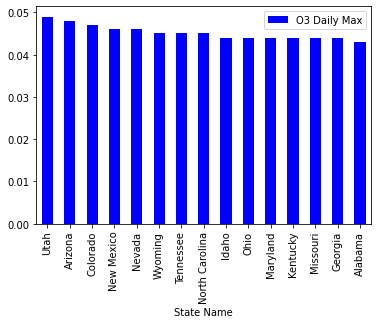

In [ ]:
#States with top 15 median O3 daily max levels for the years 2000-2020 (median less affected by outliers)
O3_df[['O3 Daily Max','State Name']].groupby(["State Name"]).median().sort_values(by= 'O3 Daily Max',ascending=False).head(15).plot.bar(color='b')
plt.show()


#States with top 10 median S02 levels for the most recent year (2020, median less affected by outliers)
#O3_2020[['1st Max Value','State Name']].groupby(["State Name"]).median().sort_values(by='1st Max Value',ascending=False).head(10).plot.bar(color='b')
#plt.show()


#States with top 10 median AQI for the years 2000-2020)
#O3_df[['AQI','State Name']].groupby(["State Name"]).median().sort_values(by='AQI',ascending=False).head(10).plot.bar(color='b')
#plt.show()

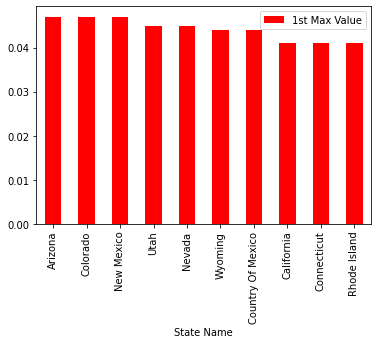

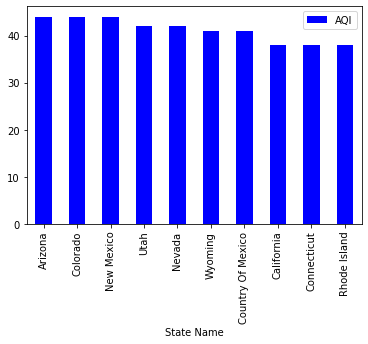

In [ ]:
#States with top 10 median S02 levels for the most recent year (2020, median less affected by outliers)
O3_2020[['1st Max Value','State Name']].groupby(["State Name"]).median().sort_values(by='1st Max Value',ascending=False).head(10).plot.bar(color='r')
plt.show()

#States with top 10 median AQI for the most recent year (2020)
O3_2020[['AQI','State Name']].groupby(["State Name"]).median().sort_values(by='AQI',ascending=False).head(10).plot.bar(color='b')
plt.show()

##Fitting a statistical distribution to the data

###Histogram of O3 values

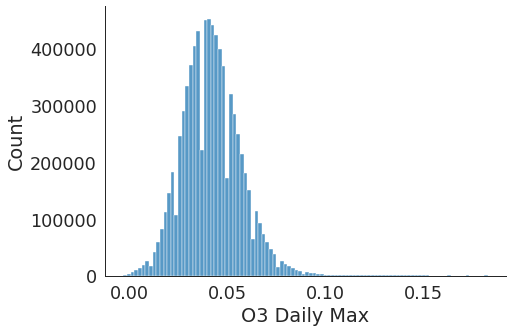

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
#sns.displot(data=S02_df, x="AQI", kind="hist", bins = 100, aspect = 1.5)
sns.displot(data=O3_df, x="O3 Daily Max", kind="hist", bins = 100, aspect = 1.5)


In [ ]:
get_common_distributions()

['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform']

,sumsquare_error,aic,bic,kl_div
norm,451.963754,1816.668688,-7.634945e+07,inf
expon,7866.879038,-202.313510,-5.399926e+07,inf
uniform,8259.494482,-332.401721,-5.361824e+07,inf


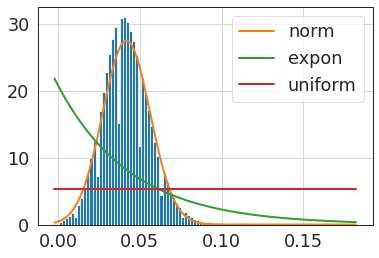

In [ ]:
O3_daily_max = O3_df['O3 Daily Max'].values
f = Fitter(O3_daily_max ,
           distributions=['uniform',
                          "expon",
                          "norm"])
f.fit()
f.summary()

In [ ]:
##this explicitly gets the best distribution for the data we supplied along with the optimal parameters
f.get_best(method = 'sumsquare_error')

{'norm': {'loc': 0.04187987637191451, 'scale': 0.014490277731965314}}

##Plotting Daily Max O3 concentration for a particular monitoring site

In [ ]:
State_df = O3_df[O3_df['State Name'] == 'Arizona']
city_df = O3_df[O3_df['City Name'] == 'Houston']
set(city_df['Address'])

{'1262 1/2 Mae Drive',
 '1307 1/2 CRAWFORD ST.',
 '13826 1/2 Croquet',
 '2311 Texas Ave',
 '3333 1/2 Hwy 6 South',
 '4401 1/2 Lang Rd',
 '4510 1/2 Aldine Mail Rd',
 '5425 POLK AVE., SUITE H',
 '6400 Bissonnet Street',
 '7330 1/2 North Wayside',
 '7421 Park Place Blvd',
 '9525 1/2 Clinton Dr',
 '9726 1/2 Monroe'}

In [ ]:

Address_df

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Year,Units of Measure,Event Type,Observation Count,Observation Percent,1st Max Hour,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,Date,O3 Daily Mean,O3 Daily Max
290802,48,201,1035,44201,3,29.733726,-95.257593,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2000,Parts per million,None,17,100.0,10,26,NaN,-,Clinton,9525 1/2 Clinton Dr,Texas,Harris,Houston,"Houston-The Woodlands-Sugar Land, TX",2018-07-21,2000-01-01,0.019647,0.028
290803,48,201,1035,44201,3,29.733726,-95.257593,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2000,Parts per million,None,17,100.0,8,23,NaN,-,Clinton,9525 1/2 Clinton Dr,Texas,Harris,Houston,"Houston-The Woodlands-Sugar Land, TX",2018-07-21,2000-01-02,0.018706,0.025
290804,48,201,1035,44201,3,29.733726,-95.257593,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2000,Parts per million,None,17,100.0,20,21,NaN,-,Clinton,9525 1/2 Clinton Dr,Texas,Harris,Houston,"Houston-The Woodlands-Sugar Land, TX",2018-07-21,2000-01-03,0.017235,0.023
290805,48,201,1035,44201,3,29.733726,-95.257593,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2000,Parts per million,None,17,100.0,9,17,NaN,-,Clinton,9525 1/2 Clinton Dr,Texas,Harris,Houston,"Houston-The Woodlands-Sugar Land, TX",2018-07-21,2000-01-04,0.007412,0.018
290806,48,201,1035,44201,3,29.733726,-95.257593,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2000,Parts per million,None,17,100.0,9,21,NaN,-,Clinton,9525 1/2 Clinton Dr,Texas,Harris,Houston,"Houston-The Woodlands-Sugar Land, TX",2018-07-21,2000-01-05,0.013941,0.023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7772313,48,201,1035,44201,3,29.733726,-95.257593,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2020,Parts per million,None,17,100.0,10,36,NaN,-,Clinton,9525 1/2 Clinton Dr,Texas,Harris,Houston,"Houston-The Woodlands-Sugar Land, TX",2021-03-02,2020-12-27,0.030588,0.039
7772314,48,201,1035,44201,3,29.733726,-95.257593,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2020,Parts per million,None,17,100.0,10,30,NaN,-,Clinton,9525 1/2 Clinton Dr,Texas,Harris,Houston,"Houston-The Woodlands-Sugar Land, TX",2021-03-02,2020-12-28,0.027059,0.032
7772315,48,201,1035,44201,3,29.733726,-95.257593,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2020,Parts per million,None,17,100.0,8,32,NaN,-,Clinton,9525 1/2 Clinton Dr,Texas,Harris,Houston,"Houston-The Woodlands-Sugar Land, TX",2021-03-02,2020-12-29,0.032176,0.035
7772316,48,201,1035,44201,3,29.733726,-95.257593,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2020,Parts per million,None,17,100.0,19,28,NaN,-,Clinton,9525 1/2 Clinton Dr,Texas,Harris,Houston,"Houston-The Woodlands-Sugar Land, TX",2021-03-02,2020-12-30,0.027588,0.030


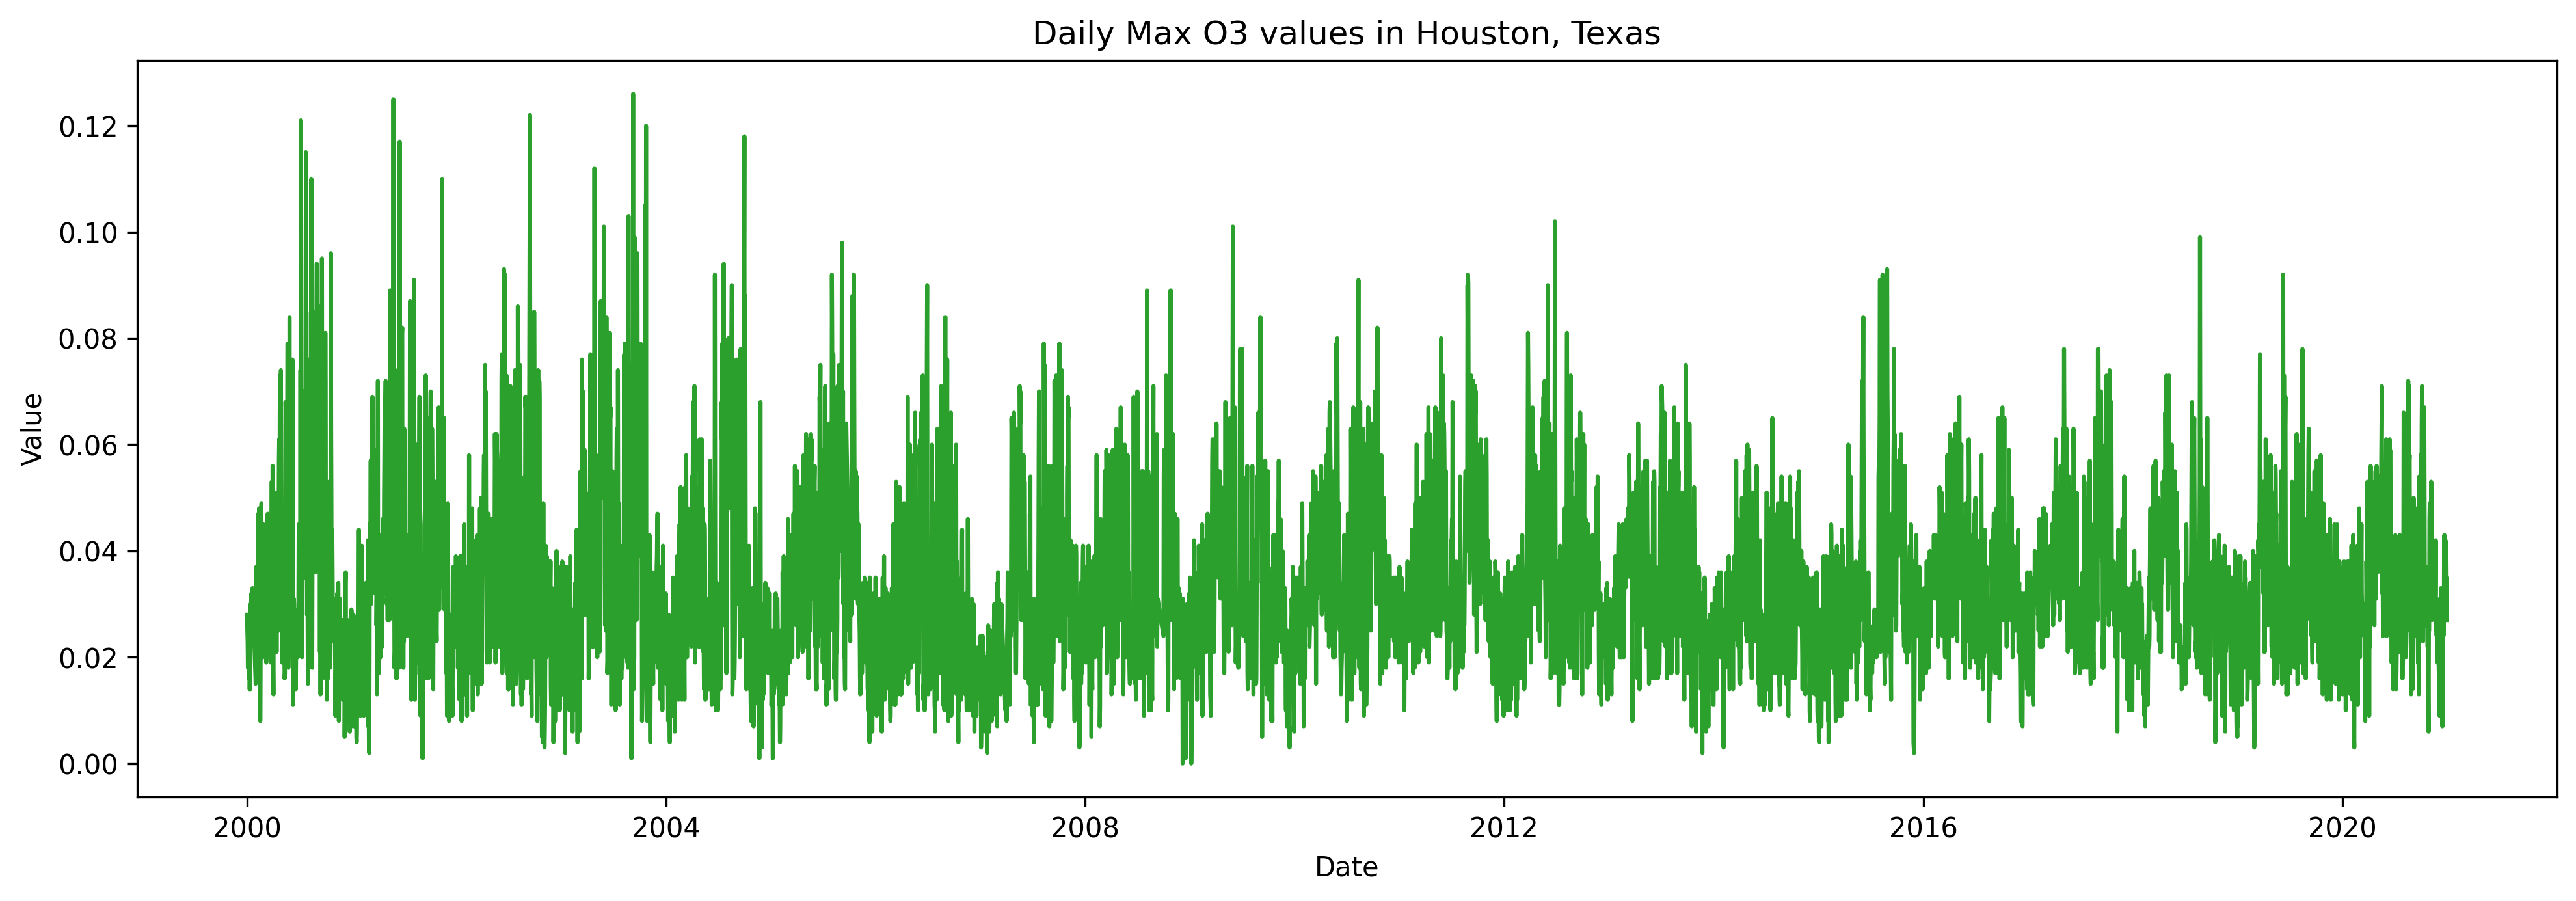

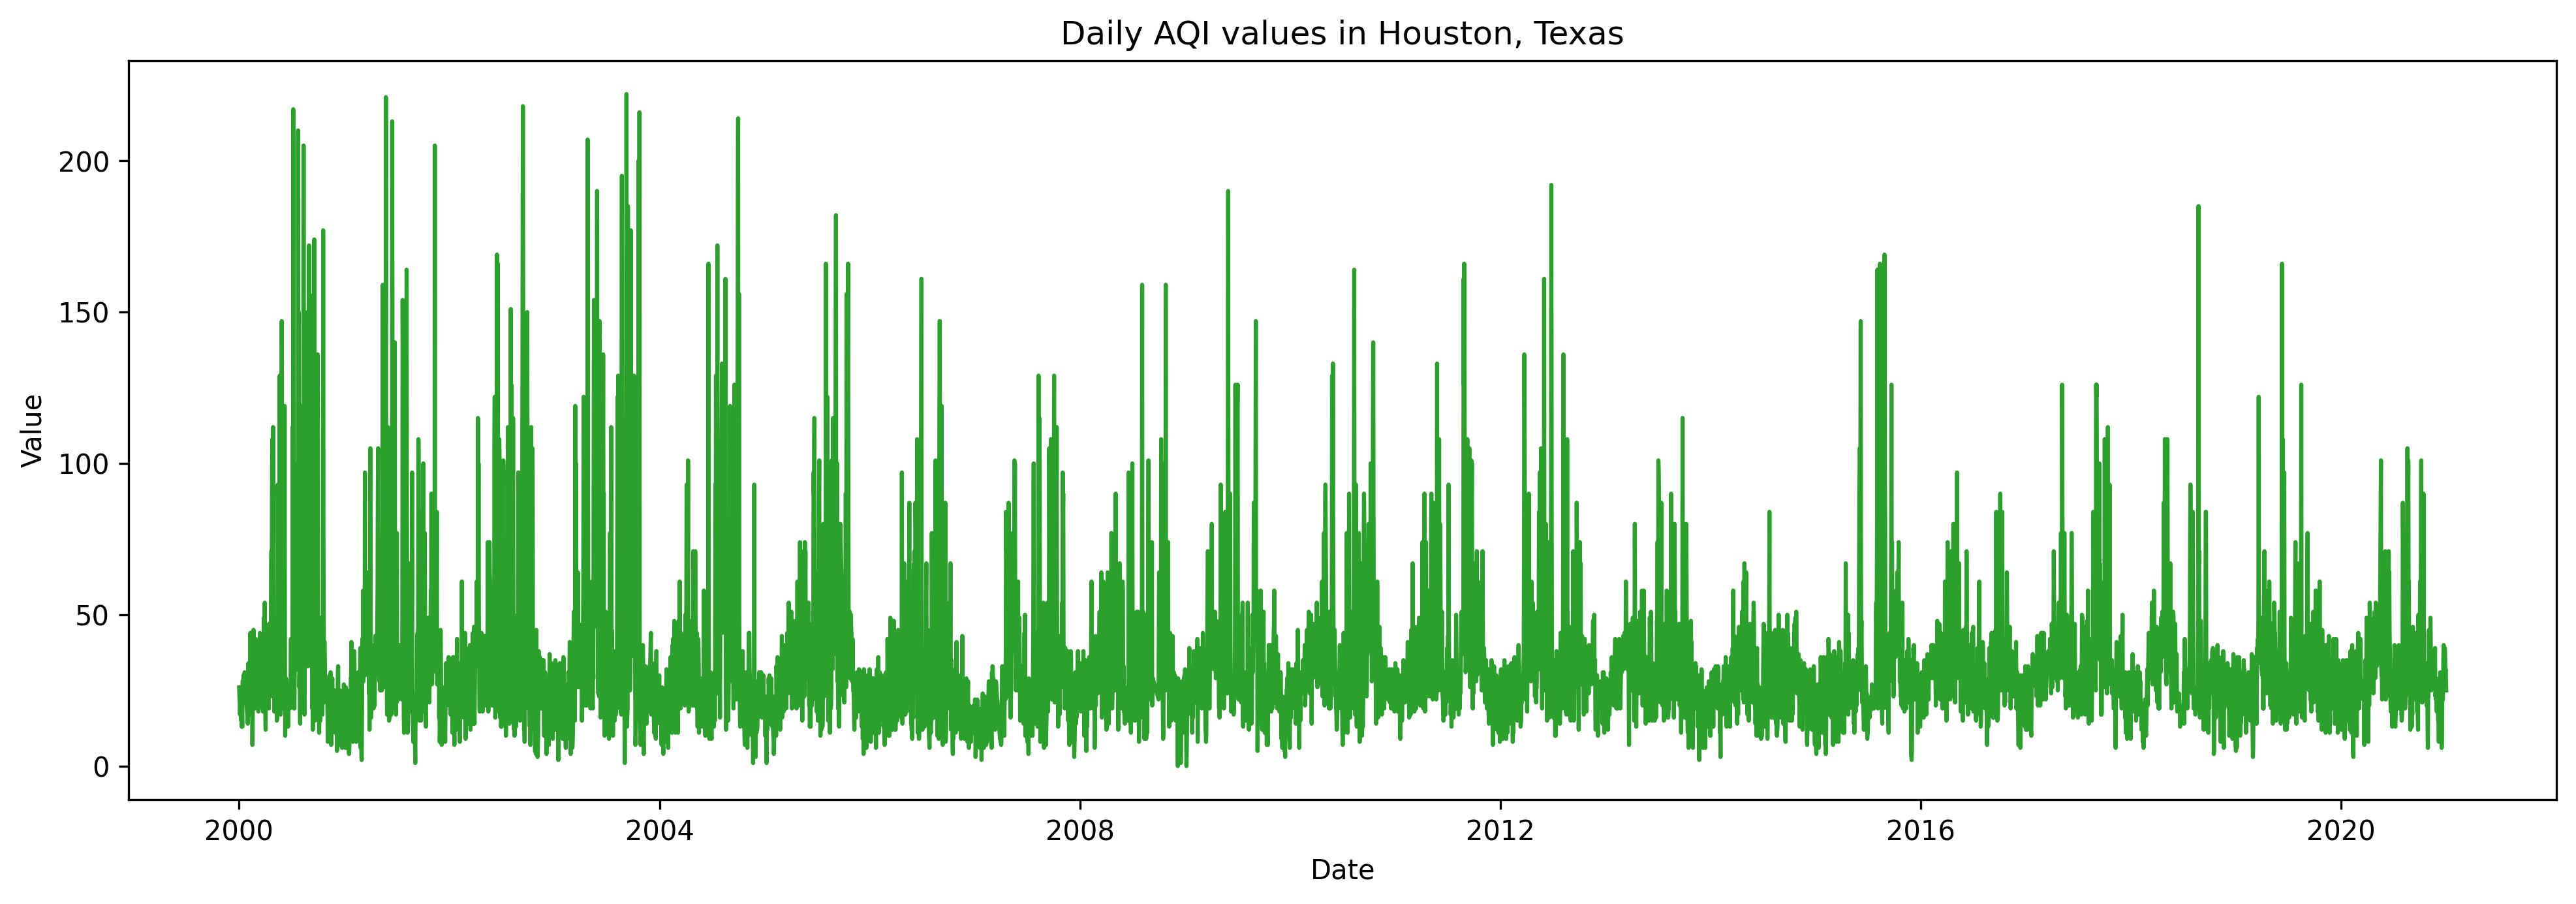

In [ ]:



#State_df = O3_df[O3_df['State Name'] == 'Pennsylvania']
#this df/ site is the focus of our time series decomposition, coming up next
Address_df = O3_df[O3_df['Address']== '9525 1/2 Clinton Dr']
#Address_df.dtypes


#Address_df.head()

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=300):
    city = list(df['City Name'])[0]
    state = ', '+list(df['State Name'])[0]
    plt.figure(figsize=(16,5), dpi=dpi)
   
    plt.plot(x, y, color= 'tab:green')
    plt.gca().set(title=title+city+state , xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(Address_df, x=Address_df['Date'], y= Address_df['O3 Daily Max'], title='Daily Max O3 values in ' )
plot_df(Address_df, x=Address_df['Date'], y= Address_df['AQI'], title='Daily AQI values in ' )

##Plotting O3 concentrations in 9 different cities for comparison

In [ ]:
#O3_recent = O3_df[O3_df['Year'].isin(['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'])]

FL_df = O3_df[O3_df['Address']== '5121 Gandy Blvd, Tampa, FL 33611']
Pitt_df = O3_df[O3_df['Address']== '301 39th St, Pittsburgh, PA 15201 (Lawrenceville)']
LA_df = O3_df[O3_df['Address'] == '1630 N MAIN ST, LOS ANGELES']
Philadelphia_df = O3_df[O3_df['Address']== 'GRANT-ASHTON ROADS PHILA NE AIRPORT']
Denver_df = O3_df[O3_df['Address']== '3174 E. 78TH AVE.']
AZ_df = O3_df[O3_df['Address']== '601 E BUTLER DR & N 6TH ST,PHOENIX']


Houston_df = O3_df[O3_df['Address']== '9525 1/2 Clinton Dr']
KC_df = O3_df[O3_df['Address']== '1210 N. 10TH ST.,JFK RECREATION CENTER']
MW_df = O3_df[O3_df['Address']== '2300 N M. L. KING JR DR']

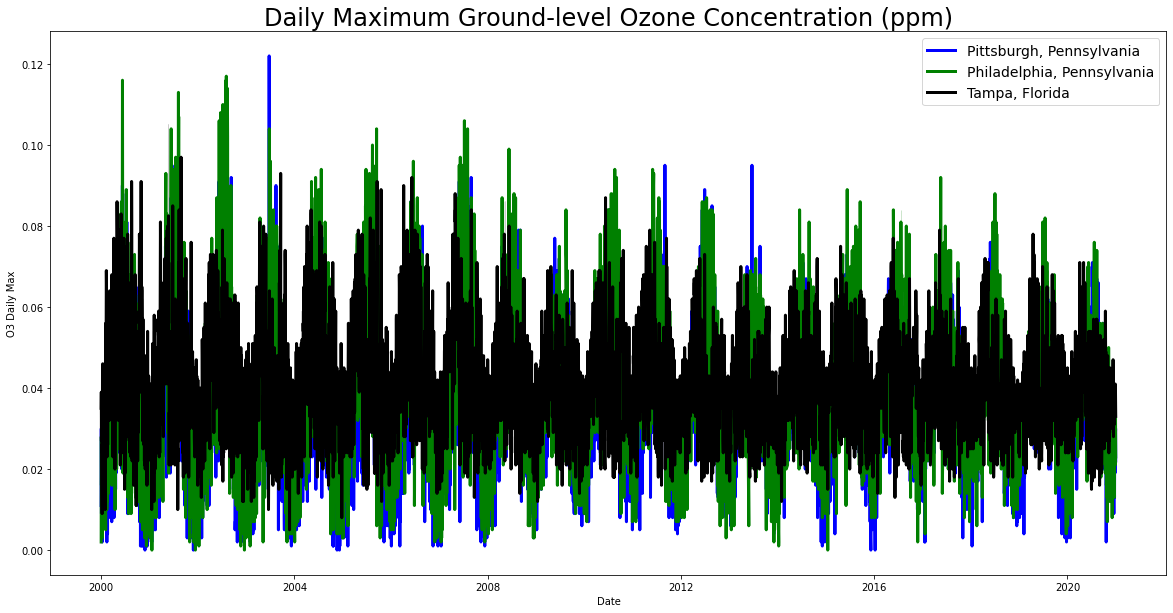

In [ ]:
#Better to split this into two plots, one showing pitt/phil and the other showing AZ, CO, CA
fig,ax = plt.subplots(figsize=(20, 10))
#sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})

sns.lineplot(x="Date", y="O3 Daily Max", data=Pitt_df, color="b",label = 'Pittsburgh, Pennsylvania')
sns.lineplot(x="Date", y="O3 Daily Max", data=Philadelphia_df, color="g",label = 'Philadelphia, Pennsylvania')
sns.lineplot(x="Date", y="O3 Daily Max", data=FL_df, color="black",label = 'Tampa, Florida')

plt.rcParams["xtick.labelsize"] = 15

ax.set_title('Daily Maximum Ground-level Ozone Concentration (ppm)')
ax.set_xticklabels([0,2000,2004,2008,2012,2016,2020])
ax.legend(fontsize = 14)

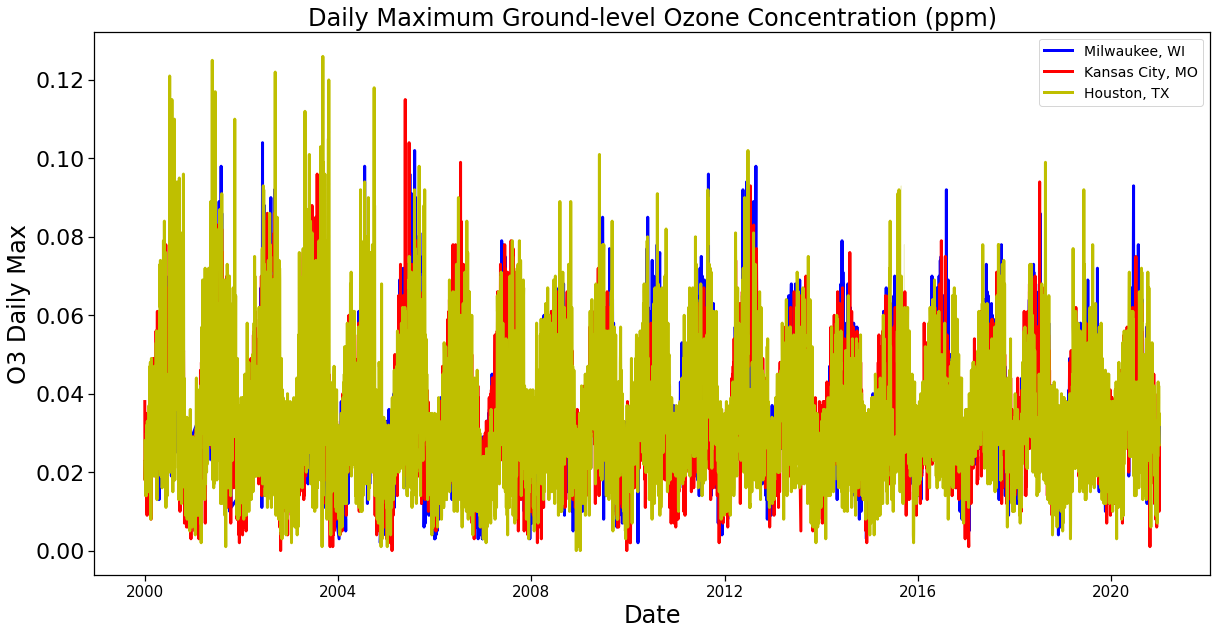

In [ ]:
fig,ax = plt.subplots(figsize=(20, 10))
#sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})

sns.lineplot(x="Date", y="O3 Daily Max", data=MW_df, color="b",label = 'Milwaukee, WI')
sns.lineplot(x="Date", y="O3 Daily Max", data=KC_df, color="r",label = 'Kansas City, MO')
sns.lineplot(x="Date", y="O3 Daily Max", data=Houston_df, color="y",label = 'Houston, TX')

plt.rcParams["xtick.labelsize"] = 15

ax.set_title('Daily Maximum Ground-level Ozone Concentration (ppm)')
ax.set_xticklabels([0,2000,2004,2008,2012,2016,2020])
ax.legend(fontsize = 14)

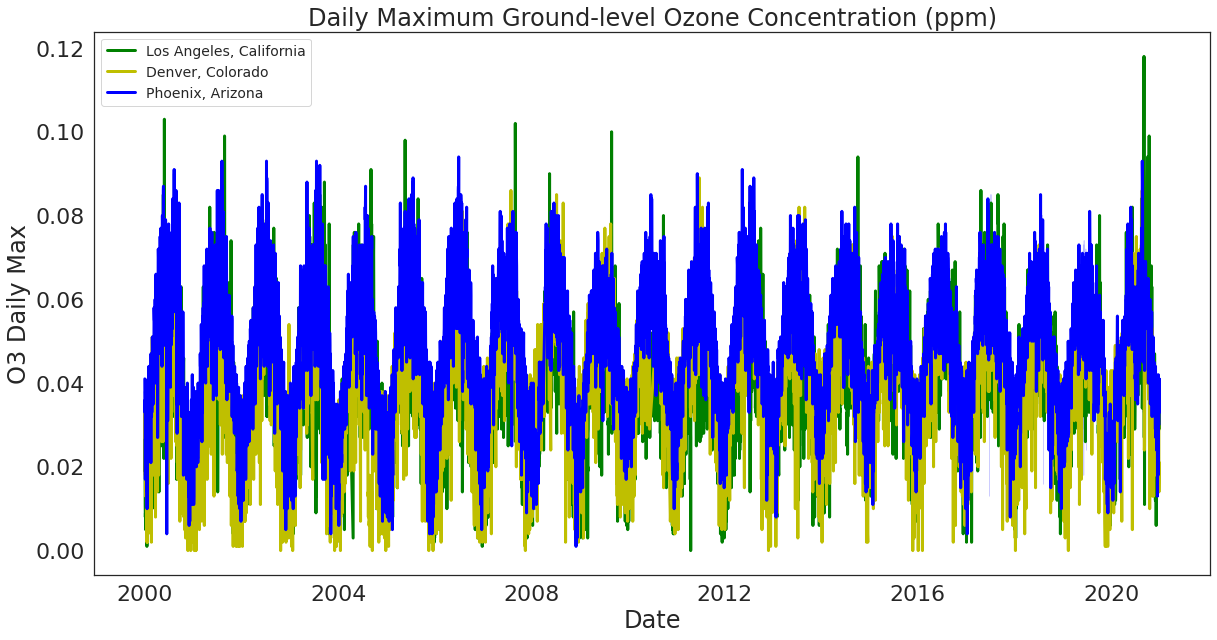

In [ ]:
fig,ax = plt.subplots(figsize=(20, 10))
#sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})


sns.lineplot(x="Date", y="O3 Daily Max", data=LA_df, color="g",label = 'Los Angeles, California')

sns.lineplot(x="Date", y="O3 Daily Max", data=Denver_df, color="y",label = 'Denver, Colorado')
sns.lineplot(x="Date", y="O3 Daily Max", data=AZ_df, color="b",label = 'Phoenix, Arizona')
ax.set_xticklabels([0,2000,2004,2008,2012,2016,2020])
plt.rcParams["xtick.labelsize"] = 15

ax.set_title('Daily Maximum Ground-level Ozone Concentration (ppm)')
ax.legend(fontsize = 14)

#Time Series

##Multiplicative/ additive decomposition

In [ ]:
#set(Address_df['O3 Daily Max'])

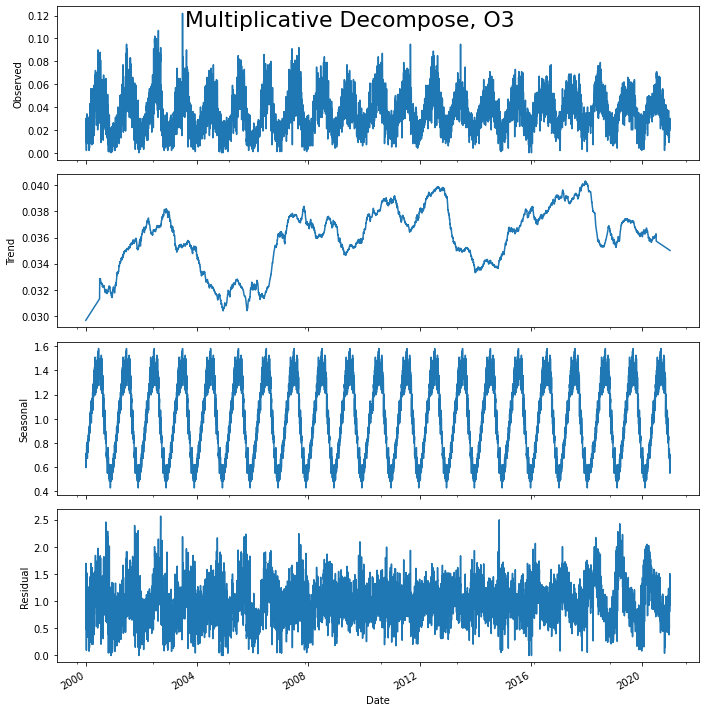

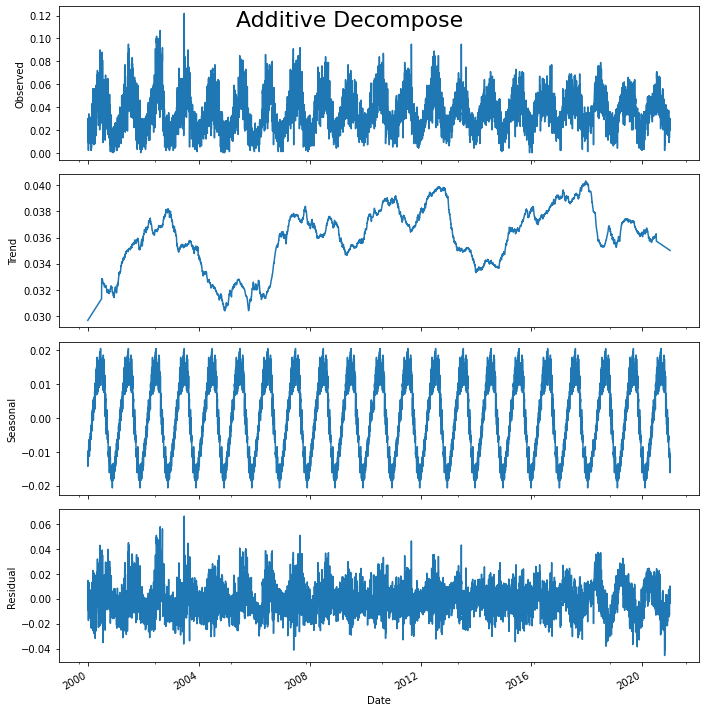

In [ ]:
#This makes the date column the index column, which is necessary for time series decomposition
#what about tests for seasonality - by eye, it is probably not stationary
#Then, how can we make it stationary for forecasting purposes?
Address_df = O3_df[O3_df['Address']== '301 39th St, Pittsburgh, PA 15201 (Lawrenceville)']
Address_df = Address_df.set_index('Date')


#increases 1st max value by 0.00000001 so that all values are >0
Address_df['O3 Daily Max']= Address_df['O3 Daily Max'] +0.0000000001

#Decomposition of time series into trend/ seasonality/ cylic by additive/ multiplicative models

# Multiplicative Decomposition 
result_mul = seasonal_decompose(Address_df['O3 Daily Max'], model='multiplicative', freq= 365, extrapolate_trend= 'freq')

# Additive Decomposition
result_add = seasonal_decompose(Address_df['O3 Daily Max'], model='additive', freq =365, extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose, O3', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

There appears to be some pattern left over in the residuals of the additive decomposition, for this reason we prefer the multiplicative decomposition

##Forecasting with fbprophet package

In [ ]:
#Now we will use fbprophet package to forecast O3 values for 2 years based on previous data
#first we need to reinsert the Date index as a column, then rename the Date and columns
#for fbprophet package

date_df = Address_df.reset_index()
date_df = date_df.rename(columns={'Date': 'ds', 'O3 Daily Max': 'y'})


#if model is underfitting increase changepoint, if model is overfitting decrease changepoint
O3_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
O3_prophet.fit(date_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model RMSE: 0.011078417451511268


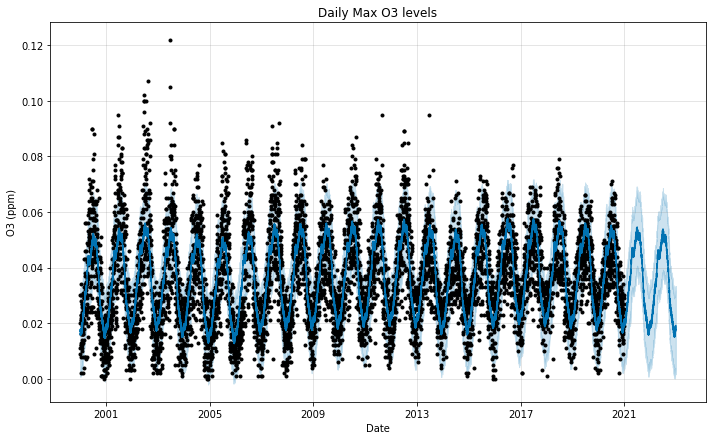

In [ ]:
# Make a future dataframe for 2 years
O3_forecast = O3_prophet.make_future_dataframe(periods=365 * 2, freq='D')
# Make predictions
O3_pred = O3_prophet.predict(O3_forecast)

#calculate rmse
se = np.square(O3_pred.loc[:7586,'yhat'] - date_df['y'])
mse = np.mean(se)
rmse = np.sqrt(mse)
print("Model RMSE:",rmse)

#plot the predictions along with actual data
O3_prophet.plot(O3_pred, xlabel = 'Date', ylabel = 'O3 (ppm)')
plt.title('Daily Max O3 levels');


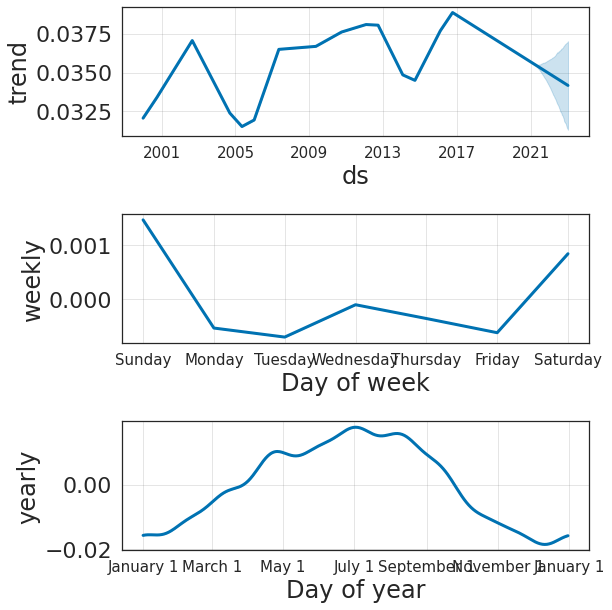

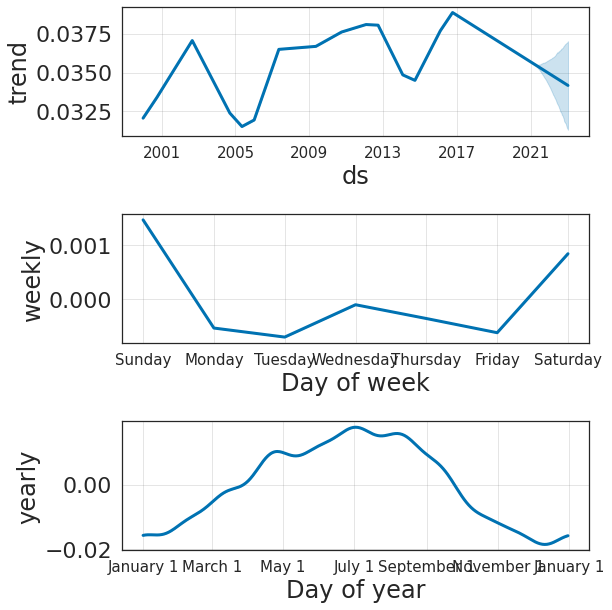

In [ ]:
#plot the different components, showing trend, weekly seasonality, and yearly seasonality
O3_prophet.plot_components(O3_pred)

###Changepoints

<function matplotlib.pyplot.show>

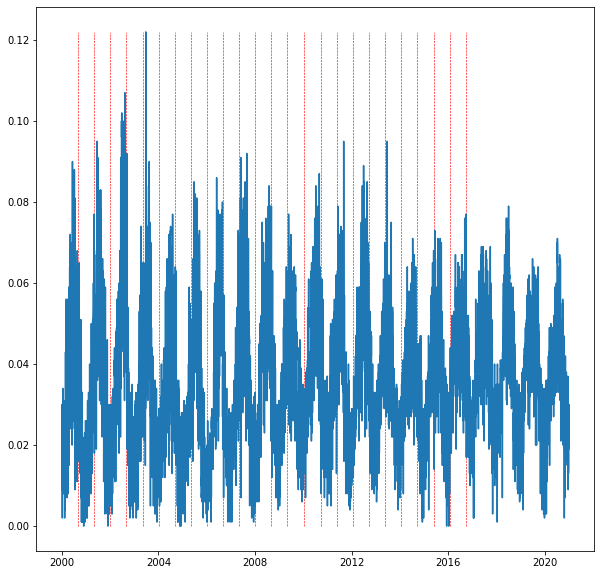

In [ ]:
O3_changepoints = [date for date in O3_prophet.changepoints]

#plotting the Actual data along with the changepoints
plt.plot(date_df['ds'], date_df['y'], label = 'Daily Max O3 (ppm)')
# Plot the changepoints
plt.vlines(O3_changepoints, ymin = 0, ymax= np.max(date_df['y']), colors = 'r', linewidth=0.6, linestyles = 'dashed', label = 'Changepoints')
plt.show

##Granger Causality Test

In [ ]:
#Great Circle calculations:

import math

DEGREES_IN_RADIAN = 57.29577951
MEAN_EARTH_RADIUS_KM = 6371
KILOMETRES_IN_MILE = 1.60934


def conv_radians(degree):
    return degree/ DEGREES_IN_RADIAN

def calc_central_angle(lat1,lat2,lon1,lon2):

        """
        Slightly complex formula for calculating the central angle
        between two points on the surface of a sphere.
        """

        if lon1>lon2:
            longitudes_abs_diff = lon1-lon2
        else:
            longitudes_abs_diff = lon2-lon1

        central_angle_radians = math.acos( math.sin(lat1)
                                         * math.sin(lat2)
                                         + math.cos(lat1)
                                         * math.cos(lat2)
                                         * math.cos(longitudes_abs_diff))
        return central_angle_radians

def calc_dist(central_angle):

        """
        Because we are using radians, this is a simple formula multiplying the radius
        by the angle, the actual units used being irrelevant.
        Also the distance in miles is calculated from kilometres.
        """

        distance_kilometres = MEAN_EARTH_RADIUS_KM * central_angle

        distance_miles = distance_kilometres / KILOMETRES_IN_MILE
        return distance_miles

In [ ]:
O3_df.dropna(axis=0,subset=['Address', 'Latitude', 'Longitude'],inplace=True) #gets rid of any rows with "nan" address
#set(O3_df['Address'])
O3_df.shape

(7823333, 30)

In [ ]:
dist100

[]

##Creating list of good addresses, ie locations which contain at least 6000 observations

In [ ]:
add_ls = list(set(O3_df['Address']))
good_add_ls = []
for i in range(len(add_ls)):
    df = O3_df[O3_df['Address']==add_ls[i]]
    if(df.shape[0]>=6000):
        good_add_ls.append(add_ls[i])


In [ ]:
len(good_add_ls)


486

In [ ]:
#Saving good_add_ls for future use
good_add_df = pd.DataFrame(good_add_ls)

csv = good_add_df.to_csv("good_add_csv",index=True)

In [ ]:
#loading good_address_csv
URL = 'https://drive.google.com/file/d/1j3PQse8w8cqT9yMSZkObKbK5nDc9CAxT/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('good_add.csv')

gadd_df = pd.read_csv('good_add.csv')
gadd_df

,Unnamed: 0,0
0,0,"237 1/2 N. 'D' ST., PERRIS"
1,1,301 Spring Garden Road
2,2,12532 1/2 Nuestra Drive
3,3,"SIERRA SKYPARK#2-BLYTHE & CHNNLT, FRESNO"
4,4,534 4TH ST.
...,...,...
481,481,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)"
482,482,MAMMOTH CAVE NP - ALFRED COOK ROAD
483,483,"Veterans Park, Park Road at end of W. 25th St."
484,484,EAST END OF ASTER LANE


In [ ]:
good_add_ls = list(gadd_df['0'])
len(good_add_ls)

486

##Randomly sampling locations (instead of iterating)

In [ ]:
import math
import random
from statsmodels.tsa.stattools import grangercausalitytests

tup_ls = []


for i in range(900):
    x = random.randint(0,len(good_add_ls)-1)
    y = random.randint(0,len(good_add_ls)-1)

    Address_df1 = O3_df[O3_df['Address']==good_add_ls[x]]
    Address_df2 = O3_df[O3_df['Address']==good_add_ls[y]]

    #Address_df1.dropna(subset=['O3 Daily Max'],inplace=True)
    #Address_df2.dropna(subset=['O3 Daily Max'],inplace=True)

    col1 = list(Address_df1['O3 Daily Max'])
    col2 = list(Address_df2['O3 Daily Max'])





    #calculating distance
    lat1, lon1 = list(Address_df1['Latitude'])[1], list(Address_df1['Longitude'])[1]
    lat2, lon2 = list(Address_df2['Latitude'])[1], list(Address_df2['Longitude'])[1]
    lat1, lon1 = conv_radians(lat1), conv_radians(lon1)
    lat2, lon2 = conv_radians(lat2), conv_radians(lon2)
    central_angle = calc_central_angle(lat1,lat2,lon1,lon2)
    dist = calc_dist(central_angle)




    #make the columns the same length
    if (len(col1)>len(col2)):
        col1 = col1[:len(col2)]

    if (len(col2)>len(col1)):
        col2 = col2[:len(col1)]


    #create new dataframe which is the concatentation of these two columns

    df1 = pd.DataFrame(col1)
    df2 = pd.DataFrame(col2)
    df = pd.concat([df1,df2],axis=1)





    gct = grangercausalitytests(df, maxlag=5 ,verbose=False)
    correlated = 0
    if (gct[1][0]['ssr_chi2test'][1])<0.05:
        correlated = 1
    elif (gct[2][0]['ssr_chi2test'][1])<0.05:
        correlated = 1
    elif (gct[3][0]['ssr_chi2test'][1])<0.05:
        correlated = 1


    ls2 = [dist,correlated]
    tup_ls.append(ls2)
    

In [ ]:
df1 = pd.DataFrame(tup_ls, columns = ['Distance (miles)', 'Result of GCT'])

In [ ]:
np.mean(df1['Result of GCT'])

0.77

In [ ]:
bins = [1, 250, 500, 750, 1000, 1250, 1500, 2000]
groups = df1.groupby(pd.cut(df1['Distance (miles)'], bins))
groups['Result of GCT'].mean()

Distance (miles)
(1, 250]        0.779070
(250, 500]      0.795918
(500, 750]      0.813725
(750, 1000]     0.763780
(1000, 1250]    0.794643
(1250, 1500]    0.705882
(1500, 2000]    0.742647
Name: Result of GCT, dtype: float64

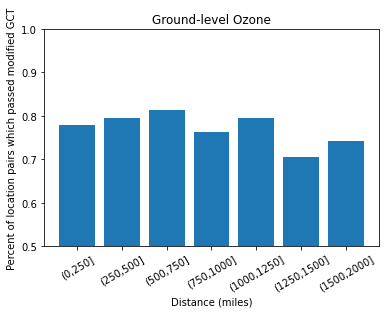

In [ ]:
bar_data = {'Distance (miles)':['(0,250]', '(250,500]', '(500,750]', '(750,1000]', '(1000,1250]', '(1250,1500]', '(1500,2000]'],
          'Percent of location pairs which pass modified GCT':[0.779,0.7959,0.814,0.764,0.795,0.706,0.743]}

bar_df = pd.DataFrame(bar_data)

plt.bar(bar_df['Distance (miles)'],bar_df['Percent of location pairs which pass modified GCT'])
plt.title('Ground-level Ozone')
plt.xlabel('Distance (miles)')
plt.ylabel('Percent of location pairs which passed modified GCT')
plt.xticks(rotation=30)
plt.ylim(0.5,1)
plt.show()

In [ ]:
dist
correlated = 1
if (gct[1][0]['ssr_chi2test'][1])>0.05:
    correlated = 0
elif (gct[2][0]['ssr_chi2test'][1])>0.05:
    correlated = 0
elif (gct[3][0]['ssr_chi2test'][1])>0.05:
    correlated = 0
correlated


0

In [ ]:
Address_df2

In [ ]:
dist30

[]

##GCT

In [ ]:
#This test tells us if one time series is useful in forecasting another
#WE have seen that locations close to one another are almost invariably correlated, one question that might be interestign which we try to definitively answer
#is HOW FAR two locations must be to remain correlated, does this differ with the pollutant we are considering ie SO2 or O3?
from statsmodels.tsa.stattools import grangercausalitytests


#Address_df1 = O3_df[O3_df['Address']== '301 39th St, Pittsburgh, PA 15201 (Lawrenceville)']
Address_df1 = O3_df[O3_df['Address']== '150 WATERMAN (DET-SW-GHIB)']
Address_df2 = O3_df[O3_df['Address']== 'GRANT-ASHTON ROADS PHILA NE AIRPORT']


col1 = Address_df1['O3 Daily Max']
col2 = Address_df2['O3 Daily Max']

#make the columns the same length

if (len(col1)>len(col2)):
    col1 = col1[:len(col2)]

if (len(col2)>len(col1)):
    col2 = col2[:len(col1)]


#create new dataframe which is the concatentation of these two columns
data = []
for i in range(len(col1)):
    val1 = list(col1)[i]
    val2 = list(col2)[i]
    ls = [val1, val2]
    data.append(ls)

df = pd.DataFrame(data, columns = ['Address1 Daily Max O3', 'Address2 Daily Max O3'])
grangercausalitytests(df, maxlag=5)

##Forecasting with Expoential Smoothing and ARIMA models

###Plotting raw, detrended, and 12 lag differenced data

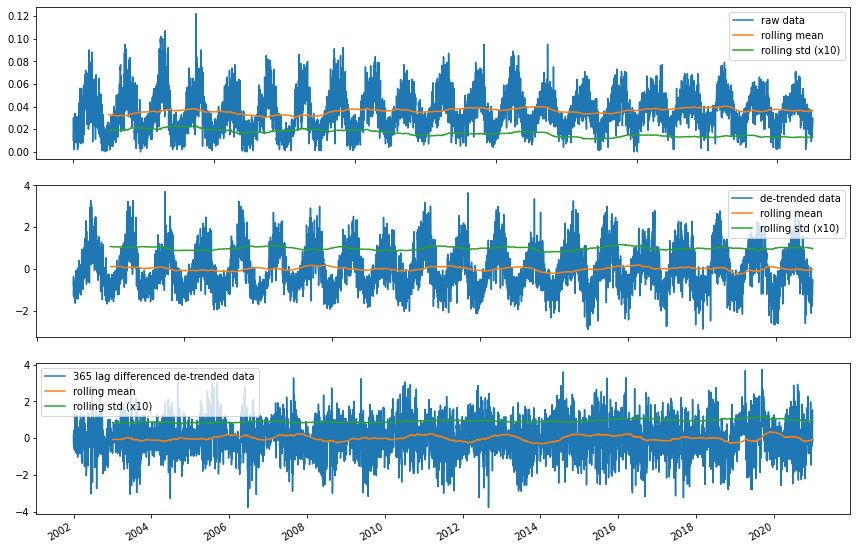

In [ ]:
Address_df = O3_df[O3_df['Address']== '301 39th St, Pittsburgh, PA 15201 (Lawrenceville)']
Address_df = Address_df.set_index('Date')
#zscore of S02 max (detrended)
Address_df['z_O3_max'] = (Address_df['O3 Daily Max'] - Address_df['O3 Daily Max'].rolling(window=365).mean()) / Address_df['O3 Daily Max'].rolling(window=365).std()
#365 lag differenced and detrended
Address_df['z_O3_differenced'] = Address_df['z_O3_max'] - Address_df['z_O3_max'].shift(365)

def plot_rolling(df, column, detrended, differenced):
    fig, ax = plt.subplots(3,figsize=(12, 9))
    ax[0].plot(df.index, df[column], label='raw data')
    ax[0].plot(df[column].rolling(window=365).mean(), label="rolling mean");
    ax[0].plot(df[column].rolling(window=365).std(), label="rolling std (x10)");
    ax[0].legend()

    ax[1].plot(df.index, df[detrended], label="de-trended data")
    ax[1].plot(df[detrended].rolling(window=365).mean(), label="rolling mean");
    ax[1].plot(df[detrended].rolling(window=365).std(), label="rolling std (x10)");
    ax[1].legend()

    ax[2].plot(df.index, df[differenced], label="365 lag differenced de-trended data")
    ax[2].plot(df[differenced].rolling(window=365).mean(), label="rolling mean");
    ax[2].plot(df[differenced].rolling(window=365).std(), label="rolling std (x10)");
    ax[2].legend()

    plt.tight_layout()
    fig.autofmt_xdate()

plot_rolling(Address_df, column = 'O3 Daily Max', detrended = 'z_O3_max', differenced = 'z_O3_differenced')

###ADF test for stationarity

In [ ]:
print(" > Is the O3 data stationary ?")
dftest = adfuller(Address_df['O3 Daily Max'], autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

 > Is the O3 data stationary ?
Test statistic = -5.803
P-value = 0.000
Critical values :
	1%: -3.4312144799396878 - The data is  stationary with 99% confidence
	5%: -2.861922035183573 - The data is  stationary with 95% confidence
	10%: -2.566973352876586 - The data is  stationary with 90% confidence


###Auto correlation plots

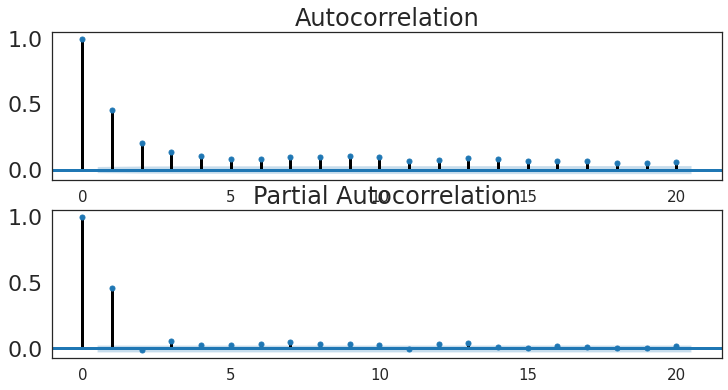

In [ ]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(Address_df['z_O3_differenced'].dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(Address_df['z_O3_differenced'].dropna(), ax=ax[1], lags=20)

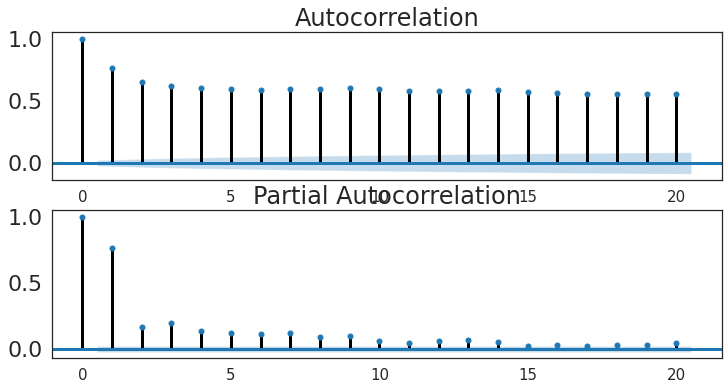

In [ ]:


fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(Address_df['O3 Daily Max'].dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(Address_df['O3 Daily Max'].dropna(), ax=ax[1], lags=20)

###Fitting ETS model

In [ ]:
Address_df = O3_df[O3_df['Address']== '301 39th St, Pittsburgh, PA 15201 (Lawrenceville)']
Address_df = Address_df.set_index('Date')
#zscore of S02 max (detrended)
Address_df['z_O3_max'] = (Address_df['O3 Daily Max'] - Address_df['O3 Daily Max'].rolling(window=365).mean()) / Address_df['O3 Daily Max'].rolling(window=365).std()
#365 lag differenced and detrended
Address_df['z_O3_differenced'] = Address_df['z_O3_max'] - Address_df['z_O3_max'].shift(365)
Address_df.reset_index(inplace=True)
Address_df = Address_df[['Date', 'O3 Daily Max', 'AQI',  'Address', 'z_O3_max', 'z_O3_differenced']]
Address_df['Date'] = pd.to_datetime(Address_df['Date'])
Address_df


,Date,O3 Daily Max,AQI,Address,z_O3_max,z_O3_differenced
0,2000-01-01,0.011,10,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",NaN,NaN
1,2000-01-02,0.030,28,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",NaN,NaN
2,2000-01-03,0.009,8,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",NaN,NaN
3,2000-01-04,0.020,19,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",NaN,NaN
4,2000-01-05,0.021,19,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",NaN,NaN
...,...,...,...,...,...,...
7582,2020-12-27,0.025,23,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",-0.898041,0.625090
7583,2020-12-28,0.027,25,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",-0.741463,0.703382
7584,2020-12-29,0.029,27,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",-0.588952,1.528097
7585,2020-12-30,0.030,28,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",-0.507404,-0.189670


In [ ]:
train = Address_df.iloc[:-730, :]
test = Address_df.iloc[-730:, :]

pred = test.copy()

model = SimpleExpSmoothing(np.asarray(train['O3 Daily Max']))
model._index = train.index

fit1 = model.fit()
pred1 = fit1.forecast(730)
fit2 = model.fit(smoothing_level=.2)
pred2 = fit2.forecast(730)
fit3 = model.fit(smoothing_level=.5)
pred3 = fit3.forecast(730)

train_x, train_y = train['Date'], train['O3 Daily Max']
test_x, test_y = test['O3 Daily Max'], test['O3 Daily Max']

###

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train_x, train_y)
ax.plot(test_x, test_y, color="gray")
for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
    ax.plot(train_x, f.fittedvalues, color=c)
    ax.plot(test['Date'], p, label="alpha="+str(f.params['smoothing_level'])[:3], color=c)
plt.title("Simple Exponential Smoothing")    
plt.legend();
    
model = Holt(np.asarray(train['O3 Daily Max']))
model._index = train.index

fit1 = model.fit(smoothing_level=.3, smoothing_slope=.05)
pred1 = fit1.forecast(730)
fit2 = model.fit(optimized=True)
pred2 = fit2.forecast(730)
fit3 = model.fit(smoothing_level=.3, smoothing_slope=.2)
pred3 = fit3.forecast(730)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train_x, train_y)
ax.plot(test_x, test_y, color="gray")
for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
    ax.plot(train_x, f.fittedvalues, color=c)
    ax.plot(test_x, p, label="alpha="+str(f.params['smoothing_level'])[:4]+", beta="+str(f.params['smoothing_slope'])[:4], color=c)
plt.title("Holt's Exponential Smoothing")
plt.legend();

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f8fdef4a5f0> (for post_execute):


ValueError: ignored

ValueError: ignored

##Fitting ARIMA model

###optimizing differencing component

                              ARMA Model Results                              
Dep. Variable:           O3 Daily Max   No. Observations:                 7587
Model:                     ARMA(0, 0)   Log Likelihood               20275.564
Method:                           css   S.D. of innovations              0.017
Date:                Sun, 12 Dec 2021   AIC                         -40547.128
Time:                        19:54:02   BIC                         -40533.260
Sample:                             0   HQIC                        -40542.369
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0359      0.000    187.258      0.000       0.036       0.036
                             ARIMA Model Results                              
Dep. Variable:         D.O3 Daily Max   No. Observat

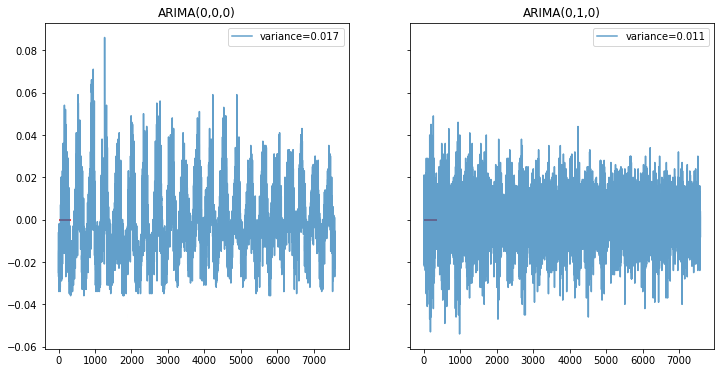

In [ ]:
model = ARIMA(Address_df['O3 Daily Max'], (0, 0, 0))
res_000 = model.fit()
print(res_000.summary())

model = ARIMA(Address_df['O3 Daily Max'], (0, 1, 0))
res_010 = model.fit()
print(res_010.summary())

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
ax[0].plot(res_000.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_000.resid.values)));
ax[0].hlines(0, xmin=0, xmax=350, color='r');
ax[0].set_title("ARIMA(0,0,0)");
ax[0].legend();
ax[1].plot(res_010.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_010.resid.values)));
ax[1].hlines(0, xmin=0, xmax=350, color='r');
ax[1].set_title("ARIMA(0,1,0)");
ax[1].legend();

###optimizing moving average component

                             ARIMA Model Results                              
Dep. Variable:         D.O3 Daily Max   No. Observations:                 7586
Model:                 ARIMA(0, 1, 0)   Log Likelihood               23120.208
Method:                           css   S.D. of innovations              0.011
Date:                Sun, 12 Dec 2021   AIC                         -46236.417
Time:                        19:54:06   BIC                         -46222.549
Sample:                             1   HQIC                        -46231.657
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.45e-06      0.000      0.011      0.991      -0.000       0.000
                             ARIMA Model Results                              
Dep. Variable:         D.O3 Daily Max   No. Observat

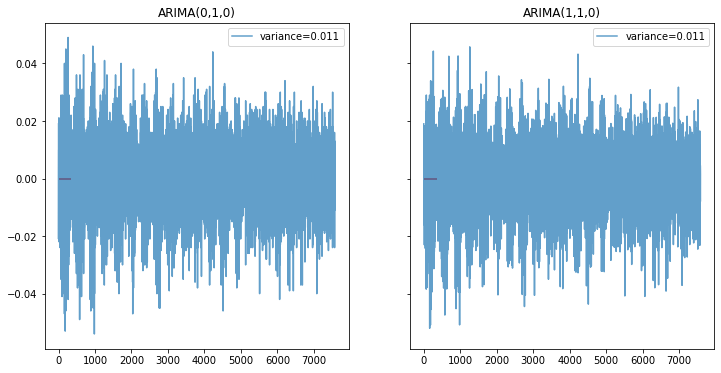

In [ ]:
model = ARIMA(Address_df['O3 Daily Max'].dropna(), (0, 1, 0))
res_010 = model.fit()
print(res_010.summary())

model = ARIMA(Address_df['O3 Daily Max'].dropna(), (1, 1, 0))
res_110 = model.fit()
print(res_110.summary())

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
ax[0].plot(res_010.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_010.resid.values)));
ax[0].hlines(0, xmin=0, xmax=350, color='r');
ax[0].set_title("ARIMA(0,1,0)");
ax[0].legend();
ax[1].plot(res_110.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_110.resid.values)));
ax[1].hlines(0, xmin=0, xmax=350, color='r');
ax[1].set_title("ARIMA(1,1,0)");
ax[1].legend();

###optimizing autoregressive component

                             ARIMA Model Results                              
Dep. Variable:         D.O3 Daily Max   No. Observations:                 7586
Model:                 ARIMA(1, 1, 0)   Log Likelihood               23392.360
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sun, 12 Dec 2021   AIC                         -46778.720
Time:                        19:57:29   BIC                         -46757.917
Sample:                             1   HQIC                        -46771.580
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.143e-06      0.000      0.011      0.991      -0.000       0.000
ar.L1.D.O3 Daily Max    -0.2632      0.011    -23.755      0.000      -0.285      -0.241
            

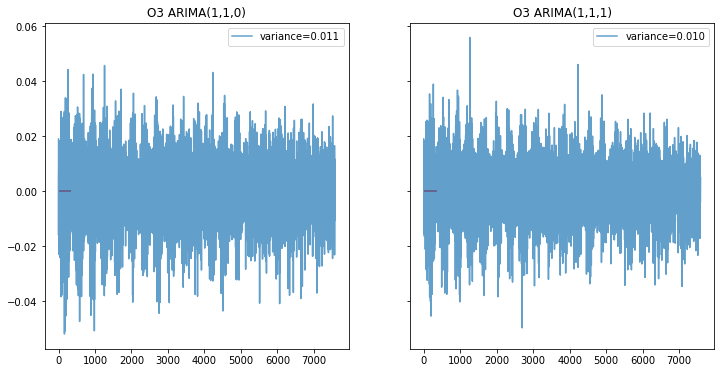

In [ ]:
model = ARIMA(Address_df['O3 Daily Max'].dropna(), (1, 1, 0))
res_110 = model.fit()
print(res_110.summary())

model = ARIMA(Address_df['O3 Daily Max'].dropna(), (1, 1, 1))
res_111 = model.fit()
print(res_111.summary())

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
ax[0].plot(res_110.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_110.resid.values)));
ax[0].hlines(0, xmin=0, xmax=350, color='r');
ax[0].set_title("O3 ARIMA(1,1,0)");
ax[0].legend();
ax[1].plot(res_111.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_111.resid.values)));
ax[1].hlines(0, xmin=0, xmax=350, color='r');
ax[1].set_title("O3 ARIMA(1,1,1)");
ax[1].legend();

We prefer the (1,1,1) model

##plotting predictions

In [ ]:
df = O3_df[O3_df['Address']== '301 39th St, Pittsburgh, PA 15201 (Lawrenceville)']
#reset index to begin at 0 and go to 15k, necessary for forecasting in the next cell
df.reset_index(inplace=True)
#df.set_index('Date', inplace=True)
df = df[['O3 Daily Max',  'Address', 'Date']]

df

,O3 Daily Max,Address,Date
0,0.011,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",2000-01-01
1,0.030,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",2000-01-02
2,0.009,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",2000-01-03
3,0.020,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",2000-01-04
4,0.021,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",2000-01-05
...,...,...,...
7582,0.025,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",2020-12-27
7583,0.027,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",2020-12-28
7584,0.029,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",2020-12-29
7585,0.030,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",2020-12-30


Model RMSE: 0.03807817355735605


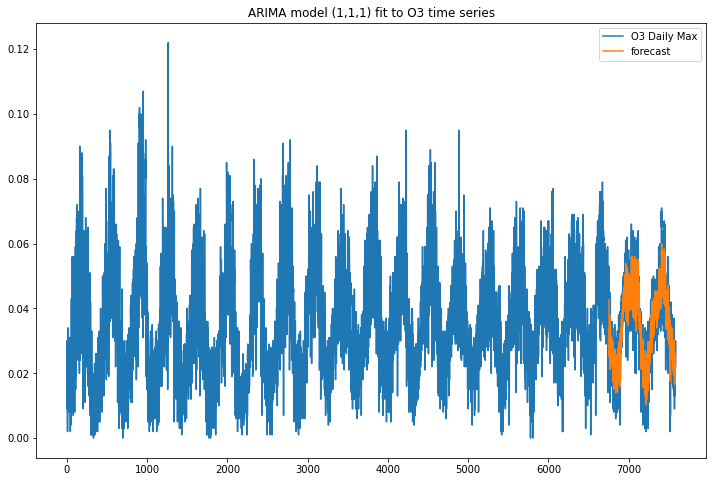

In [ ]:
model = ARIMA(df['O3 Daily Max'], (1, 1, 1))
res_111 = model.fit()

fig, ax = plt.subplots(figsize=(12, 8))
df['O3 Daily Max'].plot(ax=ax);
plt.title("ARIMA model (1,1,1) fit to O3 time series")

#calculating rmse
yhat =res_111.predict(6756,7586)
y = df['O3 Daily Max'][6756:]
se = np.square(yhat - y)
mse = np.mean(se)
rmse = np.sqrt(mse)
print("Model RMSE:",rmse)

ax = res_111.plot_predict(6756,7586 , dynamic=False, plot_insample=False, ax=ax);

In [ ]:
yhat =res_111.predict(6756,7586)
y = df['O3 Daily Max'][6756:]
y
#yhat

6756    0.024
6757    0.023
6758    0.023
6759    0.017
6760    0.026
        ...  
7582    0.025
7583    0.027
7584    0.029
7585    0.030
7586    0.022
Name: O3 Daily Max, Length: 831, dtype: float64

In [ ]:
yhat =res_111.predict(6756,7586)
y = df['O3 Daily Max'][6756:]
se = np.square(yhat - y)
mse = np.mean(se)
rmse = np.sqrt(mse)
print("Model RMSE:",rmse)

Model RMSE: 0.03807817355735605
